In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import operator


from sklearn.model_selection import train_test_split, PredefinedSplit, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import sklearn.metrics as metrics

In [3]:
pd.set_option('display.max_columns', None)

students = pd.read_csv('student.csv')

## Phase - I: Data Gathering & Reasearch Phase

In [4]:
students.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,10,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,4,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,10,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,4,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,10,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [5]:
students.shape

(4424, 35)

The dataset comprises 4,424 rows and consists of 35 columns.

In [6]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

Ranking in specific columns lacks meaningful significance, and encoding was implemented for the purpose of simplification.

In [7]:
students.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)

In [8]:
students.rename(columns={'Nacionality': 'Nationality'}, inplace=True)

cat_cols = ['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance', 
          'Previous qualification', 'Nationality', "Mother's qualification", "Father's qualification", 
          "Mother's occupation", "Father's occupation", 'Displaced', 'Educational special needs', 'Debtor', 
          'Tuition fees up to date', 'Gender', 'Scholarship holder', 'International']

cont_cols = ['Age at enrollment', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 
             'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 
             'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 
             'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 
             'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 
             'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 
             'Unemployment rate', 'Inflation rate', 'GDP']

students[cat_cols] = students[cat_cols].astype('category')

In [9]:
students.describe()

,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,23.265145,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,7.587816,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,19.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,20.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,25.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,70.000000,20.000000,26.000000,45.000000,26.000000,18.875000,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [10]:
students.describe(include=['category', 'O'])

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nationality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,International,Target
count,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424
unique,6,18,8,17,2,17,21,29,34,32,46,2,2,2,2,2,2,2,3
top,1,1,1,12,1,1,1,1,27,10,10,1,0,0,1,0,0,0,Graduate
freq,3919,1708,3026,766,3941,3717,4314,1069,1209,1577,1010,2426,4373,3921,3896,2868,3325,4314,2209


In [11]:
students.isna().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nationality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

The isna() function results indicate the absence of any missing data in the dataset.

In [12]:
students.duplicated().sum()

0

The duplicated() function results indicate that there is no replicated data in the dataset.

## Phase - II: Analysis Phase

In [13]:
df = students.copy()

In [16]:
colors = sns.color_palette('dark')
sns.set_palette('dark')
sns.set_style('ticks')
sns.set_style({'axes.facecolor':'white', 'grid.color': '.8'})

colors_gender = {'Female': colors[0], 'Male': colors[1]}
colors_attendance = {'Evening': colors[0], 'Daytime': colors[1]}
colors_binary = {'Yes': colors[0], 'No': colors[1]}
colors_target = {'Graduate': colors[-1], 'Dropout': colors[-2], 'Enrolled': colors[4]}

### Analysis of Target Variable

In [18]:
df['Target'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

C:\Users\ASHIS\AppData\Local\Temp\ipykernel_3696\780872484.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(data=data.to_frame(), y='Target', x=data.index, palette=colors_target)


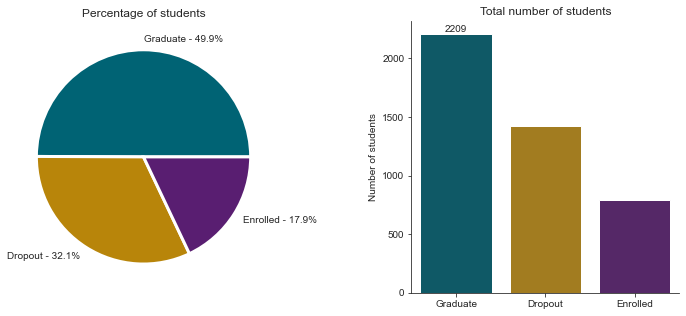

In [27]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
plt.subplots_adjust(wspace=0.5)

data = df['Target'].value_counts()

labels = [f'{label} - {np.round(data[label] / data.sum() * 100, 1)}%' for label in data.index]
ax1.pie(data, labels=labels, wedgeprops = {'linewidth' : 3, 'edgecolor' : 'white'}, 
        colors=[colors_target.get(i) for i in data.index])
ax1.set_title('Percentage of students')

ax2 = sns.barplot(data=data.to_frame(), y='Target', x=data.index, palette=colors_target)
ax2.set(xlabel=None, ylabel='Number of students')
ax2.bar_label(container=ax2.containers[0], fmt='%d')
ax2.spines[['right', 'top']].set_visible(False)
ax2.set_title('Total number of students')

plt.show()

The quantity of students who have successfully completed their studies exceeds the count of those who have discontinued their education. The overall sum of graduated and dropout students stands at 3630 (2209 graduates and 1421 dropouts), constituting the dataset for constructing our model.

Presently, there is an enrollment of 794 students, equivalent to 18% of the total student population. These are the individuals for whom our model will be applied.

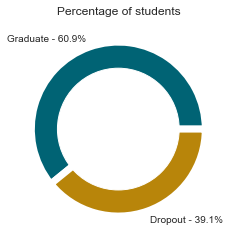

In [22]:
data = df[df['Target'] != 'Enrolled']['Target'].value_counts()

circle = plt.Circle((0,0), 0.7, color='white')
labels = [f'{label} - {np.round(data[label] / data.sum() * 100, 1)}%' for label in data.index]
plt.pie(data, labels=labels, wedgeprops = {'linewidth' : 7, 'edgecolor' : 'white'}, 
        colors=[colors_target.get(i) for i in data.index])
plt.title('Percentage of students')
p = plt.gcf()
p.gca().add_artist(circle)
plt.show()

Observing the pie chart reveals that a ratio of 6 out of 10 students successfully graduated, while conversely, 4 out of 10 students dropped out. To put it differently, there is a potential risk of dropout for every 3rd student in the course.

### Analysis of Gender Variable

In [28]:
df = df.replace({'Gender': {0: 'Female', 1: 'Male'}})

C:\Users\ASHIS\AppData\Local\Temp\ipykernel_3696\477447721.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(data=data.to_frame(), y='Gender', x=data.index, palette=colors_gender)


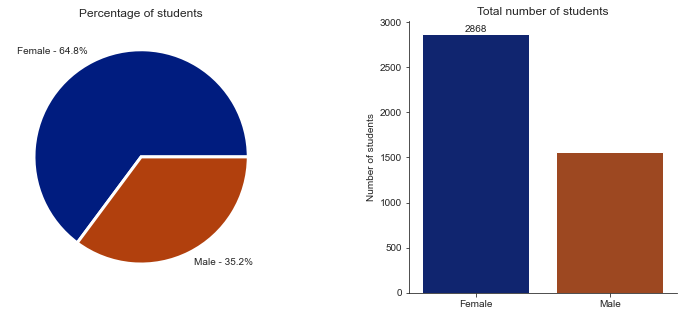

In [30]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
plt.subplots_adjust(wspace=0.5)

data = df['Gender'].value_counts()

labels = [f'{label} - {np.round(data[label] / data.sum() * 100, 1)}%' for label in data.index]
ax1.pie(data, labels=labels, wedgeprops = {'linewidth' : 3, 'edgecolor' : 'white'}, 
        colors=[colors_gender.get(i) for i in data.index])
ax1.set_title('Percentage of students')

ax2 = sns.barplot(data=data.to_frame(), y='Gender', x=data.index, palette=colors_gender)
ax2.set(xlabel=None, ylabel='Number of students')
ax2.bar_label(container=ax2.containers[0], fmt='%d')
ax2.spines[['right', 'top']].set_visible(False)
ax2.set_title('Total number of students')

plt.show()

The dataset exhibits a higher representation of female students compared to male students, with the number of female students being 30% greater. While there is a slight imbalance in the dataset, it is not anticipated to have a substantial impact on the forthcoming model.

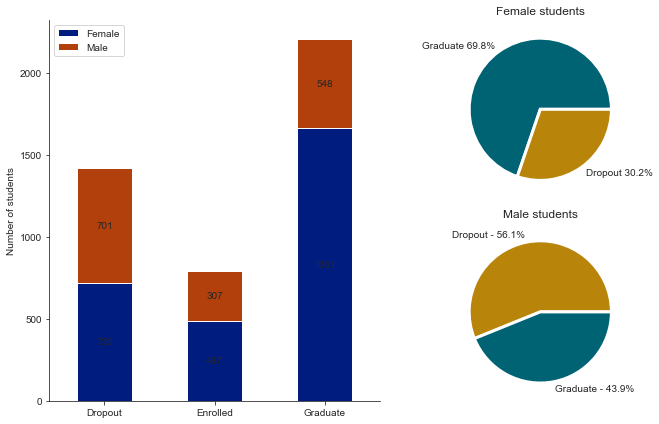

In [31]:
fig = plt.figure(figsize=(10, 6), tight_layout=True)
gs = fig.add_gridspec(nrows=2, ncols=2)

ax1 = fig.add_subplot(gs[:, 0])
data = df.groupby(['Gender', 'Target']).size().reset_index().pivot(columns='Gender', index='Target', values=0)
data.plot(ax=ax1, kind='bar', stacked=True, color=[colors_gender.get(i) for i in data.columns])
for cont in ax1.containers:
    ax1.bar_label(cont, label_type='center')
ax1.spines[['right', 'top']].set_visible(False)
ax1.set(xlabel=None, ylabel='Number of students')
ax1.legend_.set_title(None)
plt.xticks(rotation=0)
    
females = df[(df['Gender'] == 'Female') & (df['Target'] != 'Enrolled')]['Target'].value_counts()
labels = [f'{label} {np.round(females[label] / females.sum() * 100, 1)}%' for label in females.index]
ax2 = fig.add_subplot(gs[0, 1])
patches, texts = ax2.pie(females, labels=labels, colors=[colors_target.get(i) for i in females.index], 
        wedgeprops = {'linewidth' : 3, 'edgecolor' : 'white'})
ax2.set(title='Female students')

males = df[(df['Gender'] == 'Male') & (df['Target'] != 'Enrolled')]['Target'].value_counts()
labels = [f'{label} - {np.round(males[label] / males.sum() * 100, 1)}%' for label in males.index]
ax3 = fig.add_subplot(gs[1, 1])
ax3.pie(males, labels=labels, colors=[colors_target.get(i) for i in males.index], 
        wedgeprops = {'linewidth' : 3, 'edgecolor' : 'white'})
ax3.set(title='Male students')
    
plt.show()

The count of male and female students who dropped out is nearly identical. There is a slightly higher enrollment of female students compared to male students. The number of female students who successfully graduated is approximately three times greater than that of male students. Consequently, the graduation rate for female students surpasses that of male students. Conversely, the percentage of male students who dropped out is higher than the percentage of male students who graduated, with rates of 56% and 44%, respectively.

### Analysis of Age Variable

In [32]:
bins = int(math.ceil(math.log2(len(df))) + 1)
age_min = df['Age at enrollment'].min()
age_max = df['Age at enrollment'].max()
bin_int = df['Age at enrollment'].max() // bins
bin_edges = [i for i in range(age_min, age_max + bin_int, bin_int)]

age_labels = [f'{bin_edges[i]}-{bin_edges[i + 1]}' for i in range(len(bin_edges) - 1)]
df['Age at enrollment bins'] = pd.cut(df['Age at enrollment'], bin_edges, labels=age_labels)

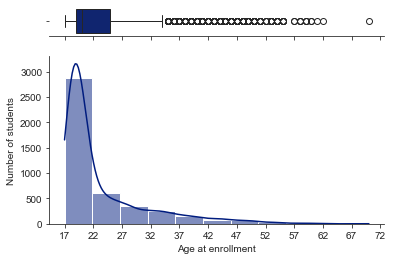

In [33]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(6, 4), gridspec_kw={"height_ratios": (.15, .85)})

ax1 = sns.boxplot(data=df, x='Age at enrollment', ax=ax1)
ax1.set(xlabel=None)

labels = df['Age at enrollment'].value_counts()
labels = [f'{label} - {round(males[label] / males.sum() * 100)}%' for label in males.index]
ax2 = sns.histplot(data=df, x='Age at enrollment', ax=ax2, bins=bins, binwidth=bin_int, kde=True)
ax2.set(ylabel='Number of students')
sns.despine(ax=ax1, left=True)
sns.despine(ax=ax2)


plt.xticks(bin_edges)
plt.show()

The majority of students fall within the 17-22 age range. The student count diminishes with each successive increase in age.

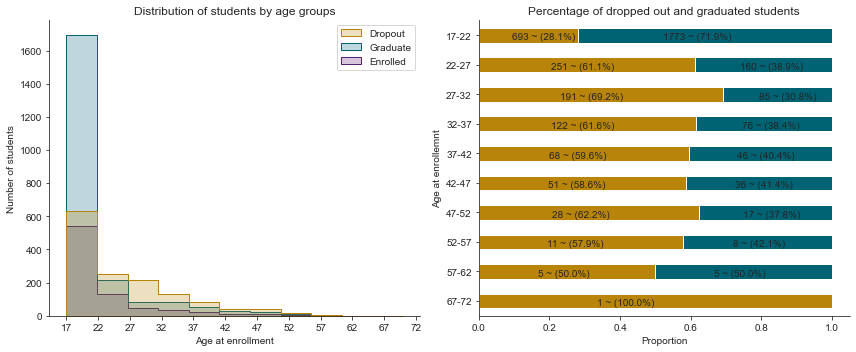

In [34]:
fig = plt.figure(figsize=(12, 5), tight_layout=True)
gs = fig.add_gridspec(nrows=1, ncols=2)

ax1 = fig.add_subplot(gs[0, 0])
ax1 = sns.histplot(data=df, x='Age at enrollment', hue='Target', element='step', bins=bins, 
                  binwidth=bin_int, palette=colors_target)
ax1.set(ylabel='Number of students')
ax1.legend_.set_title(None)
ax1.spines[['right', 'top']].set_visible(False)
ax1.set_title('Distribution of students by age groups')
plt.xticks([i for i in range(age_min, age_max + bin_int, bin_int)])

ax2 = fig.add_subplot(gs[0, 1])
data = pd.crosstab(index=df['Age at enrollment bins'], columns=df[df['Target'] != 'Enrolled']['Target'])
data_prop = pd.crosstab(index=df['Age at enrollment bins'], columns=df[df['Target'] != 'Enrolled']['Target'], normalize='index')
labels = [i for i in age_labels if i in data.index]
data_prop.loc[labels[::-1]].plot(ax=ax2, kind='barh', stacked=True, color=[colors_target.get(i) for i in data.columns])
ax2.set(xlabel='Proportion', ylabel='Age at enrollemnt')
ax2.get_legend().remove()
ax2.spines[['right', 'top']].set_visible(False)
ax2.set_title('Percentage of dropped out and graduated students')
plt.xticks(rotation=0)

for n, x in enumerate([*data.loc[labels[::-1]].index.values]):
    for (proportion, count, y_loc) in zip(data_prop.loc[x], data.loc[x], data_prop.loc[x].cumsum()):
        if proportion:
            plt.text(x=(y_loc - proportion) + (proportion / 3), y=n - 0.15, s=f'{count} ~ ({np.round(proportion * 100, 1)}%)')
        
plt.show()

Among the various age groups, the 17-22 age bracket boasts the highest graduation rate, with 72% of students successfully graduating and 28% discontinuing their studies. For the remaining age groups, there is a lack of distinct differentiation, except for the 67-72 age range, where only one student experienced dropout.

### Analysis of Marital Status Variable

In [38]:
df = df.replace({'Marital status': {1: 'Single', 2: 'Married', 3: 'Widower', 4: 'Divorced', 
                                    5: 'Facto union', 6: 'Legally separated'}})

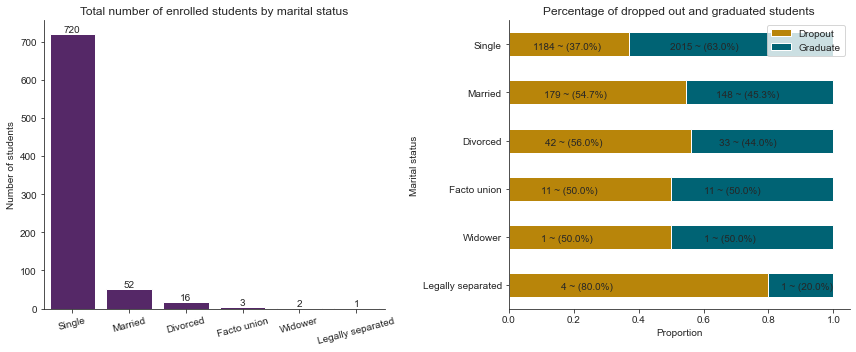

In [39]:
fig = plt.figure(figsize=(12, 5), tight_layout=True)
gs = fig.add_gridspec(nrows=1, ncols=2)

ax1 = fig.add_subplot(gs[0, 0])
data = df[df['Target'] == 'Enrolled']['Marital status'].value_counts()
order = data.index
ax1 = sns.barplot(data=data.to_frame(), y='Marital status', x=data.index, color=colors[4], order=order)
ax1.set(xlabel=None, ylabel='Number of students')
ax1.bar_label(container=ax1.containers[0], labels=data)
ax1.spines[['right', 'top']].set_visible(False)
ax1.set_title('Total number of enrolled students by marital status')
plt.xticks(rotation=15)

ax2 = fig.add_subplot(gs[0, 1])
data = pd.crosstab(index=df['Marital status'], columns=df[df['Target'] != 'Enrolled']['Target'])
data_prop = pd.crosstab(index=df['Marital status'], columns=df[df['Target'] != 'Enrolled']['Target'], normalize='index')
data_prop.loc[order[::-1]].plot(ax=ax2, kind='barh', stacked=True, color=[colors_target.get(i) for i in data.columns])
ax2.set(xlabel='Proportion', ylabel='Marital status')
ax2.spines[['right', 'top']].set_visible(False)
ax2.legend_.set_title(None)
ax2.set_title('Percentage of dropped out and graduated students')
plt.xticks(rotation=0)

for n, x in enumerate([*data.loc[order[::-1]].index.values]):
    for (proportion, count, y_loc) in zip(data_prop.loc[x], data.loc[x], data_prop.loc[x].cumsum()):
        plt.text(x=(y_loc - proportion) + (proportion / 5), y=n - 0.1, s=f'{count} ~ ({np.round(proportion * 100, 1)}%)')

plt.show()

Most enrolled students are unmarried. The graduation rate for single students surpasses the dropout rate. Among students with the marital status "Legally separated," the dropout percentage is the highest. However, in other groups, the distribution of dropout and graduate students is comparable, and no discernible pattern is evident.

### Analysis of Daytime/Evening Attendance

In [41]:
df = df.replace({'Daytime/evening attendance': {0: 'Evening', 1: 'Daytime'}})

C:\Users\ASHIS\AppData\Local\Temp\ipykernel_3696\73099074.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(data=data.to_frame(), y='Daytime/evening attendance', x=data.index, palette=colors_attendance)


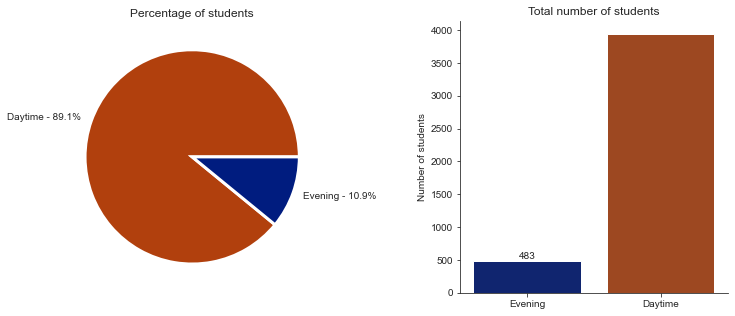

In [43]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
plt.subplots_adjust(wspace=0.5)

data = df['Daytime/evening attendance'].value_counts()

labels = [f'{label} - {np.round(data[label] / data.sum() * 100, 1)}%' for label in data.index]
ax1.pie(data, labels=labels, colors=[colors_attendance.get(i) for i in data.index], 
        wedgeprops = {'linewidth' : 3, 'edgecolor' : 'white'})
ax1.set_title('Percentage of students')

ax2 = sns.barplot(data=data.to_frame(), y='Daytime/evening attendance', x=data.index, palette=colors_attendance)
ax2.set(xlabel=None, ylabel='Number of students')
ax2.bar_label(container=ax2.containers[0], fmt='%d')
ax2.set_title('Total number of students')
ax2.spines[['right', 'top']].set_visible(False)

plt.show()

The overwhelming majority of students attend classes during the daytime, constituting 89%.

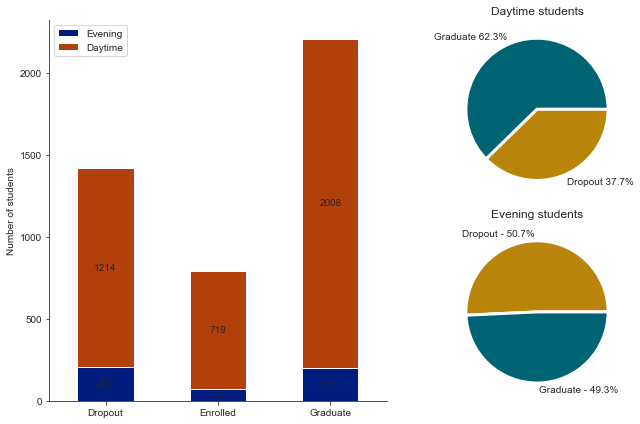

In [44]:
fig = plt.figure(figsize=(10, 6), tight_layout=True)
gs = fig.add_gridspec(nrows=2, ncols=2)

ax1 = fig.add_subplot(gs[:, 0])
data = df.groupby(['Daytime/evening attendance', 
                   'Target']).size().reset_index().pivot(columns='Daytime/evening attendance', index='Target', values=0)
data.plot(ax=ax1, kind='bar', stacked=True, color=[colors_attendance.get(i) for i in data.columns])
for cont in ax1.containers:
    ax1.bar_label(cont, label_type='center')
ax1.spines[['right', 'top']].set_visible(False)
ax1.set(xlabel=None, ylabel='Number of students')
ax1.legend_.set_title(None)
plt.xticks(rotation=0)
    
daytime = df[(df['Daytime/evening attendance'] == 'Daytime') & (df['Target'] != 'Enrolled')]['Target'].value_counts()
labels = [f'{label} {np.round(daytime[label] / daytime.sum() * 100, 1)}%' for label in daytime.index]
ax2 = fig.add_subplot(gs[0, 1])
patches, texts = ax2.pie(daytime, labels=labels, colors=[colors_target.get(i) for i in daytime.index], 
        wedgeprops = {'linewidth' : 3, 'edgecolor' : 'white'})
ax2.set(title='Daytime students')

evening = df[(df['Daytime/evening attendance'] == 'Evening') & (df['Target'] != 'Enrolled')]['Target'].value_counts()
labels = [f'{label} - {np.round(evening[label] / evening.sum() * 100, 1)}%' for label in evening.index]
ax3 = fig.add_subplot(gs[1, 1])
ax3.pie(evening, labels=labels, colors=[colors_target.get(i) for i in evening.index], 
        wedgeprops = {'linewidth' : 3, 'edgecolor' : 'white'})
ax3.set(title='Evening students')
    
plt.show()

The daytime students exhibit a higher graduation rate compared to the evening students, with rates of 62% and 49%, respectively. However, the observed difference is not considered statistically significant. Notably, the Daytime/evening attendance variable is imbalanced, with 719 daytime students compared to only 75 evening students. Due to this imbalance, it is advised against using Daytime/evening attendance as a predictor variable.

### Analysis of Course Variable

In [45]:
df[['Course']] = df[['Course']].replace({'Course': {1: 'Biofuel Production Technologies', 2: 'Animation and Multimedia Design', 
                                                    3: 'Social Service (evening attendance)', 4: 'Agronomy', 
                                                    5: 'Communication Design', 6: 'Veterinary Design', 
                                                    7: 'Informatics Engineering', 8: 'Equiniculture', 9: 'Management', 
                                                    10: 'Social Service', 11: 'Tourism', 12: 'Nursing', 13: 'Oral Hygiene', 
                                                    14: 'Advertising and Marketing Management', 
                                                    15: 'Journalism and Communication', 16: 'Basic Education', 
                                                    17: 'Management (evening attendance)'}})

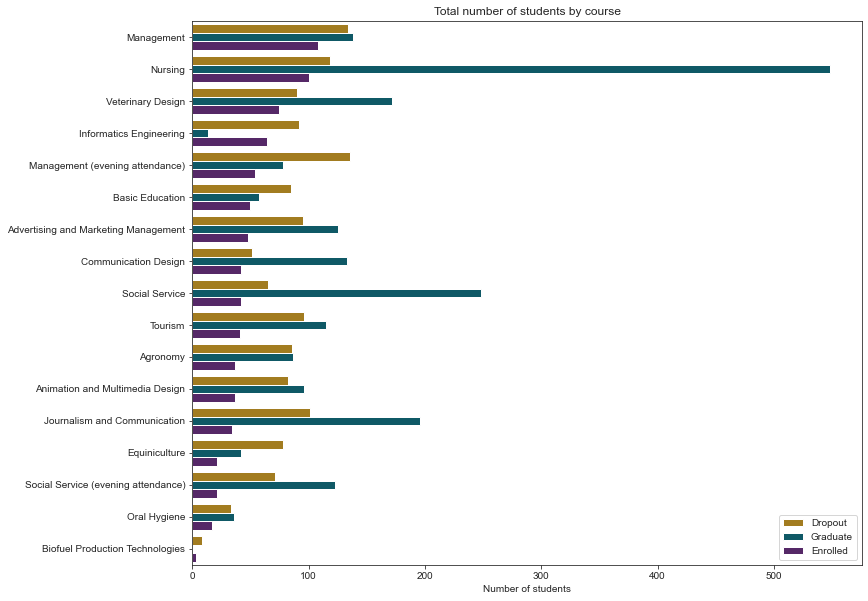

In [46]:
fig, ax = plt.subplots(figsize=(12, 10))
order = df[df['Target'] == 'Enrolled']['Course'].value_counts().index
ax = sns.countplot(data=df, y='Course', hue='Target', palette=colors_target, order=order)
ax.set(xlabel='Number of students', ylabel=None, title='Total number of students by course')
ax.legend_.set_title(None)
plt.show()

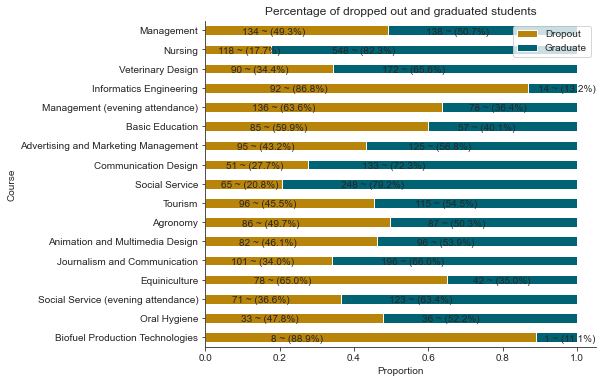

In [47]:
data = pd.crosstab(index=df['Course'], columns=df[df['Target'] != 'Enrolled']['Target'])
data_prop = pd.crosstab(index=df['Course'], columns=df[df['Target'] != 'Enrolled']['Target'], normalize='index')
ax = data_prop.loc[order[::-1]].plot(kind='barh', stacked=True, 
                                     color=[colors_target.get(i) for i in data.columns], figsize=(7, 6))
ax.set(xlabel='Proportion', ylabel='Course')
ax.spines[['right', 'top']].set_visible(False)
ax.legend_.set_title(None)
ax.set_title('Percentage of dropped out and graduated students')
plt.xticks(rotation=0)

for n, x in enumerate([*data.loc[order[::-1]].index.values]):
    for (proportion, count, y_loc) in zip(data_prop.loc[x], data.loc[x], data_prop.loc[x].cumsum()):
        plt.text(x=(y_loc - proportion) + (proportion / 5), y=n - 0.2, s=f'{count} ~ ({np.round(proportion * 100, 1)}%)')

plt.show()

A significant portion of present students is pursuing studies in the Management field, although there isn't a substantial contrast in the enrollment numbers across various courses. Nursing stands out as the predominant field for students who have successfully graduated. Conversely, the highest dropout rates are observed in Informatics Engineering and Biofuel Production Technologies courses, reaching 86.8% and 88.9%, respectively.

Overall, there is a discernible pattern, indicating that the percentages of dropout and graduate students vary across different courses. Consequently, the variable "Course" can be employed as a predictor in the model.

In [ ]:
### Analysis of Previous Qualification Variable

The descriptive statistics reveal that a specific qualification, Secondary education, is represented by 3,717 instances, constituting 84% of the entire dataset. By plotting a count chart, it becomes evident that the majority of students hold Secondary education (1) as their previous qualification. Notably, the variable "Previous qualification" exhibits a high level of imbalance.

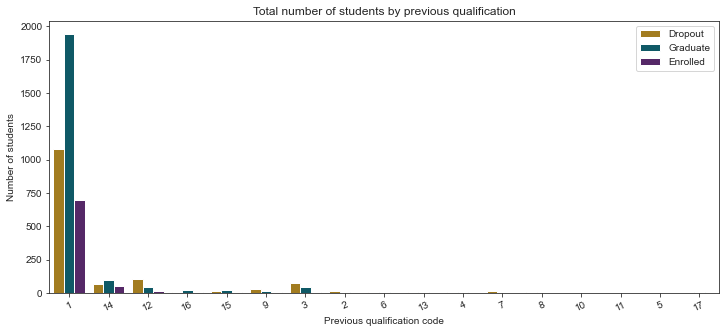

In [48]:
fig, ax = plt.subplots(figsize=(12, 5))
order = df[df['Target'] == 'Enrolled']['Previous qualification'].value_counts()
ax = sns.countplot(data=df, x='Previous qualification', hue='Target', palette=colors_target, order=order.index)
ax.set(xlabel='Previous qualification code', ylabel='Number of students', 
       title='Total number of students by previous qualification')
plt.xticks(rotation=25)
ax.legend_.set_title(None)
plt.show()

The majority of students hold secondary education (1) as their previous qualification. The variable Previous qualification demonstrates a notable imbalance.

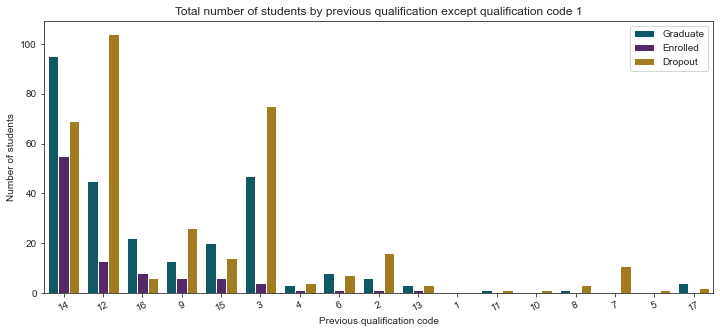

In [49]:
fig, ax = plt.subplots(figsize=(12, 5))
data = df[df['Previous qualification'] != 1]
order = data[data['Target'] == 'Enrolled']['Previous qualification'].value_counts()
ax = sns.countplot(data=data, x='Previous qualification', hue='Target', palette=colors_target, order=order.index)
ax.set(xlabel='Previous qualification code', ylabel='Number of students', 
       title='Total number of students by previous qualification except qualification code 1')
plt.xticks(rotation=25)
ax.legend_.set_title(None)
plt.show()

### Analysis of Mother's qualification, Father's qualification Variable

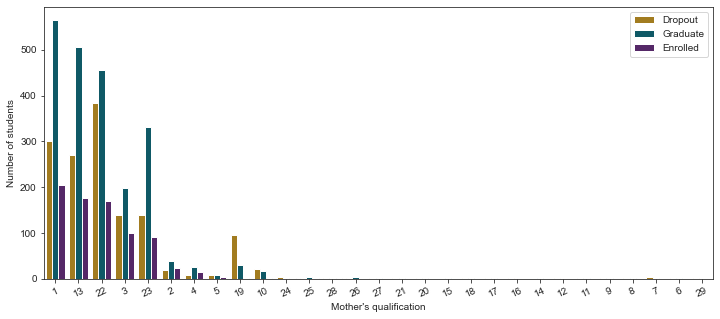

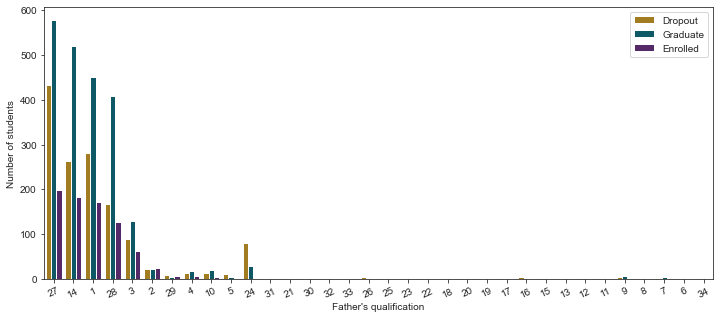

In [50]:
cols = ["Mother's qualification", "Father's qualification"]

for col in cols:
    fig, ax = plt.subplots(figsize=(12, 5))
    order = df[df['Target'] == 'Enrolled'][col].value_counts()
    ax = sns.countplot(data=df, x=col, hue='Target', palette=colors_target, order=order.index)
    ax.set(xlabel=col, ylabel='Number of students')
    plt.xticks(rotation=25)
    ax.legend_.set_title(None)
    plt.show()

### Analysis of Mother's occupation, Father's occupation Variable

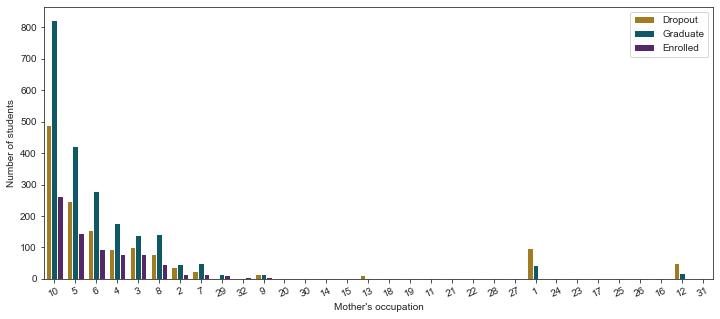

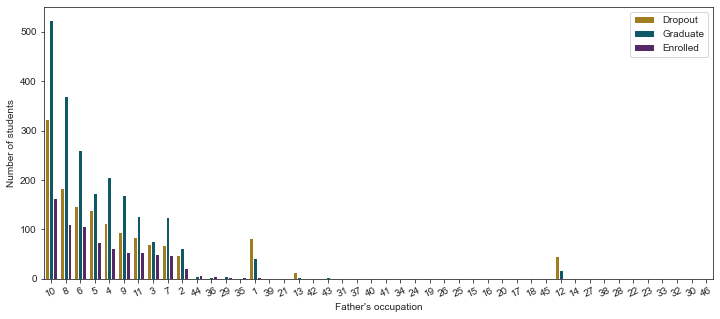

In [51]:
cols = ["Mother's occupation", "Father's occupation"]

for col in cols:
    fig, ax = plt.subplots(figsize=(12, 5))
    order = df[df['Target'] == 'Enrolled'][col].value_counts()
    ax = sns.countplot(data=df, x=col, hue='Target', palette=colors_target, order=order.index)
    ax.set(xlabel=col, ylabel='Number of students')
    plt.xticks(rotation=25)
    ax.legend_.set_title(None)
    plt.show()

### Analysis of Displaced, Educational special needs, Debtor, Tuition fees up to date, Scholarship holder, International Variable

In [52]:
cols = ['Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Scholarship holder', 'International']
for col in cols:
    df = df.replace({col: {0: 'No', 1: 'Yes'}})

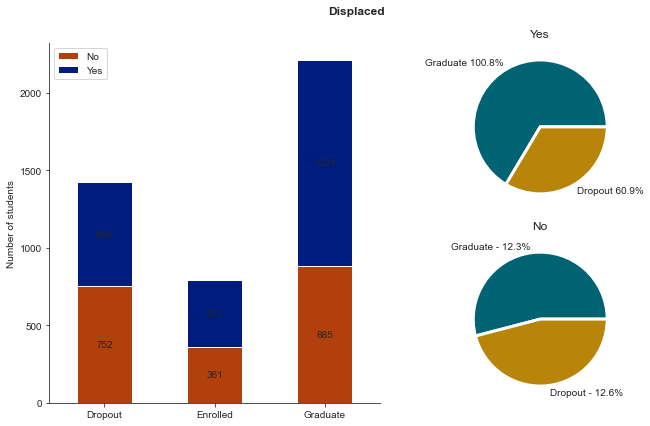

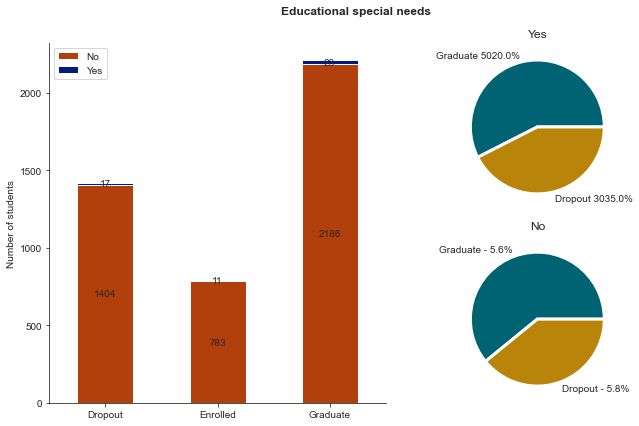

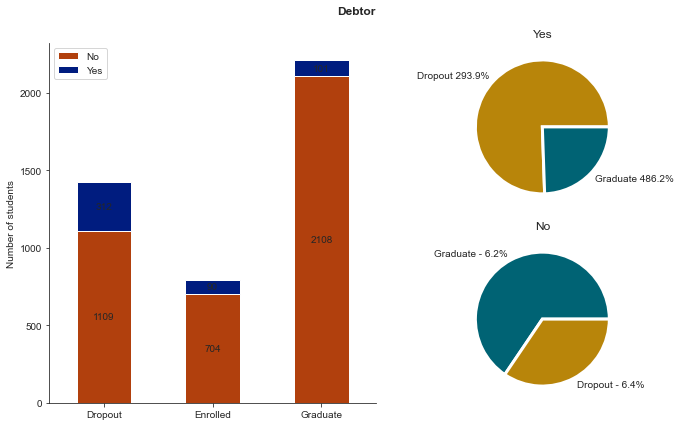

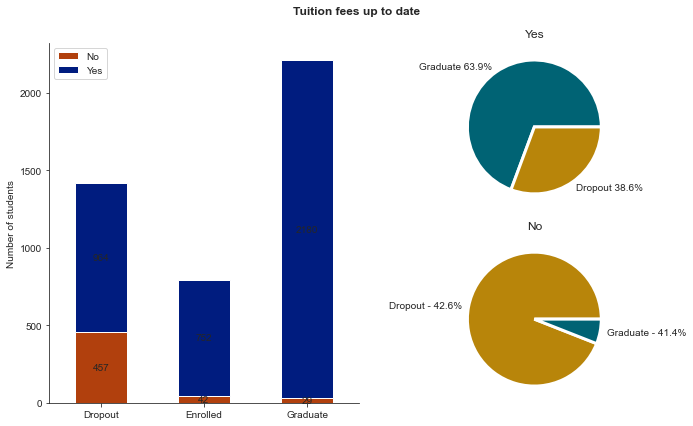

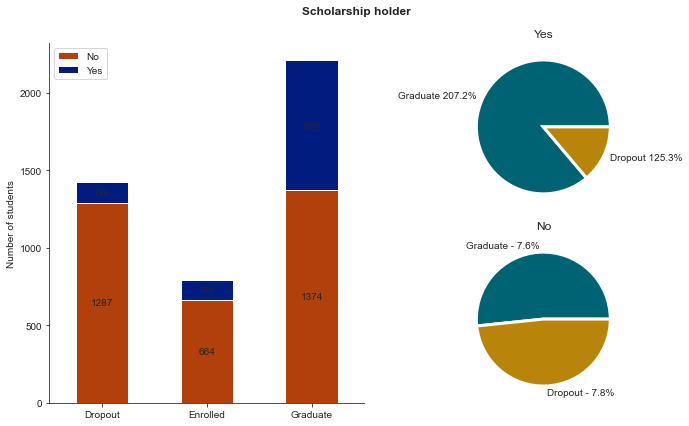

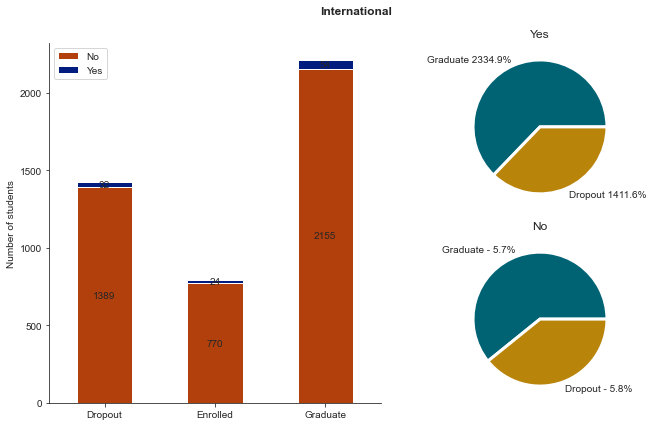

In [53]:
for col in cols:
    fig = plt.figure(figsize=(10, 6), tight_layout=True)
    gs = fig.add_gridspec(nrows=2, ncols=2)

    ax1 = fig.add_subplot(gs[:, 0])
    data = df.groupby([col, 'Target']).size().reset_index().pivot(columns=col, 
                                                                  index='Target', values=0)
    data.plot(ax=ax1, kind='bar', stacked=True, color=[colors_binary.get(i) for i in data.columns])
    for cont in ax1.containers:
        ax1.bar_label(cont, label_type='center')
    ax1.spines[['right', 'top']].set_visible(False)
    ax1.set(xlabel=None, ylabel='Number of students')
    ax1.legend_.set_title(None)
    plt.xticks(rotation=0)

    yes = df[(df[col] == 'Yes') & (df['Target'] != 'Enrolled')]['Target'].value_counts()
    labels = [f'{label} {np.round(daytime[label] / yes.sum() * 100, 1)}%' for label in yes.index]
    ax2 = fig.add_subplot(gs[0, 1])
    patches, texts = ax2.pie(yes, labels=labels, colors=[colors_target.get(i) for i in yes.index], 
            wedgeprops = {'linewidth' : 3, 'edgecolor' : 'white'})
    ax2.set(title='Yes')

    no = df[(df[col] == 'No') & (df['Target'] != 'Enrolled')]['Target'].value_counts()
    labels = [f'{label} - {np.round(evening[label] / no.sum() * 100, 1)}%' for label in no.index]
    ax3 = fig.add_subplot(gs[1, 1])
    ax3.pie(no, labels=labels, colors=[colors_target.get(i) for i in no.index], 
            wedgeprops = {'linewidth' : 3, 'edgecolor' : 'white'})
    ax3.set(title='No')
    
    fig.suptitle(col, weight='bold')
    
    plt.show()

In [ ]:
fig, axs = plt.subplots(5, 3, figsize=(12, 12))
plt.subplots_adjust(hspace=0.5)
cols = ['Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'Unemployment rate',
       'Inflation rate', 'GDP']

index = 0

for i in range(5):
    for j in range(3):
        sns.boxplot(df, x='Target', y=cols[index], showfliers=False, palette=colors_target, ax=axs[i, j])
        axs[i, j].set(xlabel=None, ylabel=None, title=cols[index])
        index += 1

## Feature Selection/Extraction

In [54]:
df = students.copy()

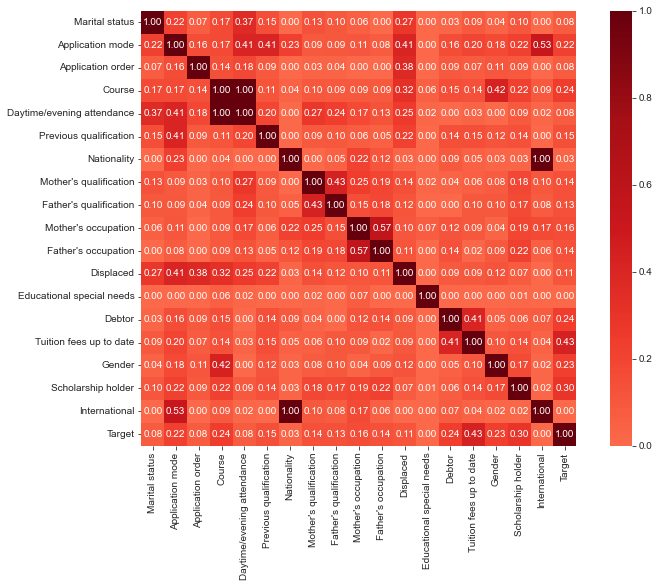

In [55]:
cols = ['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance', 
        'Previous qualification', 'Nationality', "Mother's qualification", "Father's qualification", 
        "Mother's occupation", "Father's occupation", 'Displaced', 'Educational special needs', 'Debtor', 
        'Tuition fees up to date', 'Gender', 'Scholarship holder', 'International', 'Target']

fig, ax = plt.subplots(figsize = (12, 8))

cramers_v = associations(df[cols], nom_nom_assoc='cramer', ax=ax, cmap='Reds')

We observe a robust association between certain features, indicating redundancy as they do not offer the model additional information. Notably, Mother's occupation and Father's occupation exhibit a significant association (0.57); however, we will retain only Mother's occupation due to its higher correlation with the Target. Similarly, Mother's qualification and Father's qualification show a noteworthy association (0.43), but we will keep only Mother's qualification as it has a stronger correlation with the Target. The variables Debtor and Tuition fees up to date display a substantial association (0.41), and we will retain only Tuition fees up to date due to its higher correlation with the Target. Additionally, Displaced and Application mode exhibit a notable association (0.41), and we will keep only Application mode due to its higher correlation with the Target.

Referring to the association matrix, we will select the following categorical features for further consideration: Application mode, Course, Previous qualification, Mother's qualification, Tuition fees up to date, Mother's occupation, Gender, and Scholarship holder.

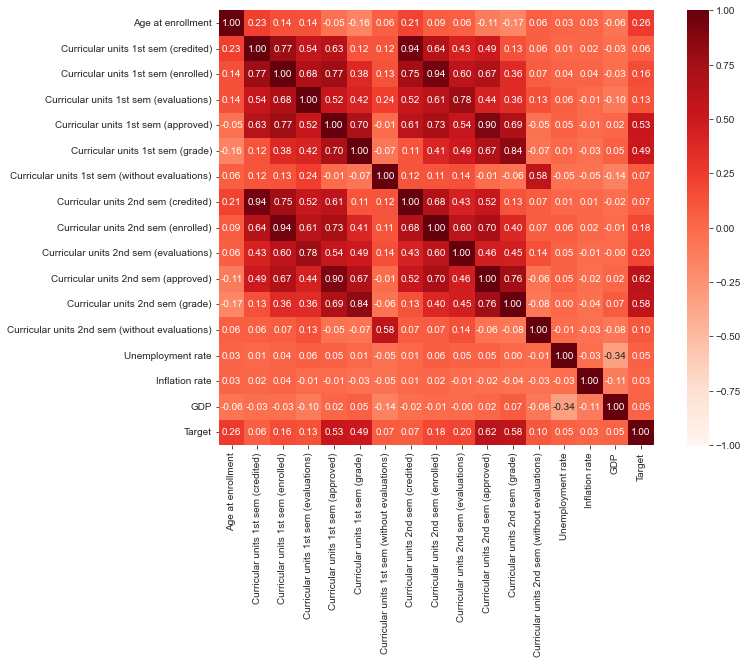

In [56]:
cols = ['Age at enrollment', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 
           'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 
           'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 
           'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 
           'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 
           'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP', 'Target']

fig, ax = plt.subplots(figsize = (12, 8))

cor_ratio = associations(df[cols], nom_num_assoc='correlation_ratio', num_num_assoc='pearson', ax=ax, cmap='Reds')

Based on the association matrix, we will choose the following categorical features for inclusion: Age at enrollment, Approved Curricular units in the 1st semester, and Approved Curricular units in the 2nd semester.

In [57]:
cols = ['Application mode', 'Course', 'Previous qualification', "Mother's qualification", 'Tuition fees up to date', 
        "Mother's occupation", 'Gender', 'Scholarship holder', 'Age at enrollment', 'Curricular units 1st sem (approved)', 
        'Curricular units 2nd sem (approved)', 'Target']

df = df[cols]

df = df[df['Target'] != 'Enrolled']

df = df.replace({'Target': {'Dropout': 0, 'Graduate': 1}})
cols = ['Tuition fees up to date', 'Gender', 'Scholarship holder', 'Target']
df[cols] = df[cols].astype('int32')

df = pd.get_dummies(df, drop_first=True)

## Phase - III: Modelling Phase

In [58]:
results = pd.DataFrame(columns=['Algorithm', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

In [59]:
y = df['Target']

X = df.copy()
X = X.drop('Target', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [60]:
def conf_matrix_plot(model, x_data, y_data):

    model_pred = model.predict(x_data)
    cm = metrics.confusion_matrix(y_data, model_pred)
    disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Dropout', 'Graduate'], )  
    disp.plot(cmap='binary', values_format='')
    plt.show()

In [61]:
def plot_roc_curve(true_y, y_prob):

    fpr, tpr, thresholds = metrics.roc_curve(true_y, y_prob)
    auc = metrics.roc_auc_score(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.text(0.95, 0.05, 'AUC = %0.3f' % auc, ha='right', weight='bold')

In [62]:
def print_results(algo, y_test, y_preds):
    
    global results
    print(algo)
    print("Accuracy:", "%.3f" % metrics.accuracy_score(y_test, y_preds))
    print("Precision:", "%.3f" % metrics.precision_score(y_test, y_preds))
    print("Recall:", "%.3f" % metrics.recall_score(y_test, y_preds))
    print("F1 Score:", "%.3f" % metrics.f1_score(y_test, y_preds))
    row = {'Algorithm': algo, 'Accuracy': metrics.accuracy_score(y_test, y_preds), 
           'Precision': metrics.precision_score(y_test, y_preds), 'Recall': metrics.recall_score(y_test, y_preds), 
           'F1 Score': metrics.f1_score(y_test, y_preds)}
    results = pd.concat([results, pd.DataFrame(row, index=[0])], ignore_index=True)
    results = results.reset_index(drop=True)

### Naive Bayes Algorithm

In [63]:
X_scaled_train = StandardScaler().fit_transform(X_train)
X_scaled_test = StandardScaler().fit_transform(X_test)
gnb = GaussianNB()
gnb.fit(X_scaled_train, y_train)
y_preds = gnb.predict(X_scaled_test)

In [64]:
print_results('Naive Bayes', y_test, y_preds)

Naive Bayes
Accuracy: 0.595
Precision: 0.595
Recall: 0.991
F1 Score: 0.744


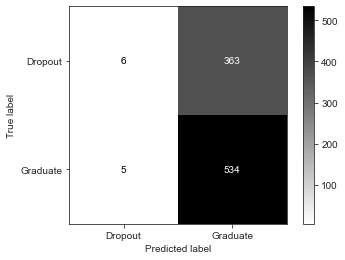

In [65]:
conf_matrix_plot(gnb, X_scaled_test, y_test)

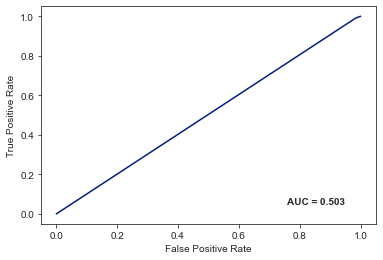

In [66]:
y_preds_prob_gnb = gnb.predict_proba(X_scaled_test)[:, 1]
plot_roc_curve(y_test, y_preds_prob_gnb)

### Logistic Regression Algorithm

In [67]:
X_scaled_train = StandardScaler().fit_transform(X_train)
X_scaled_test = StandardScaler().fit_transform(X_test)
lr = LogisticRegression()
lr.fit(X_scaled_train, y_train)
y_preds = lr.predict(X_scaled_test)

In [68]:
print_results('Logistic regression', y_test, y_preds)

Logistic regression
Accuracy: 0.887
Precision: 0.873
Recall: 0.946
F1 Score: 0.908


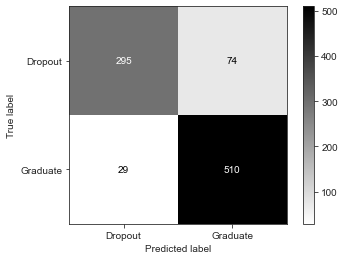

In [69]:
conf_matrix_plot(lr, X_scaled_test, y_test)

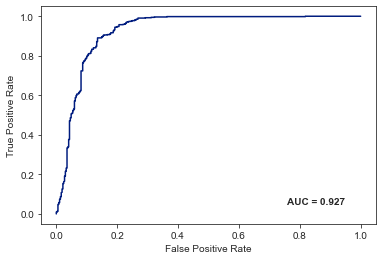

In [70]:
y_preds_prob_lr = lr.predict_proba(X_scaled_test)[:, 1]
plot_roc_curve(y_test, y_preds_prob_lr)

### Support Vector Machine

In [71]:
X_scaled_train = StandardScaler().fit_transform(X_train)
X_scaled_test = StandardScaler().fit_transform(X_test)
svm = SVC(probability=True)
svm.fit(X_scaled_train, y_train)
y_preds = svm.predict(X_scaled_test)

In [72]:
print_results('SVM', y_test, y_preds)

SVM
Accuracy: 0.868
Precision: 0.844
Recall: 0.954
F1 Score: 0.895


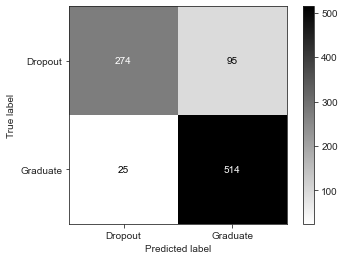

In [73]:
conf_matrix_plot(svm, X_scaled_test, y_test)

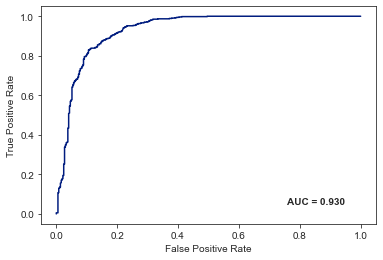

In [74]:
y_preds_prob_svm = svm.predict_proba(X_scaled_test)[:, 1]
plot_roc_curve(y_test, y_preds_prob_svm)

### Decision Tree Algorithm

In [75]:
decision_tree = DecisionTreeClassifier(random_state=0)
decision_tree.fit(X_train, y_train)
y_preds = decision_tree.predict(X_test)

In [76]:
print_results('Decision Tree', y_test, y_preds)

Decision Tree
Accuracy: 0.846
Precision: 0.874
Recall: 0.865
F1 Score: 0.869


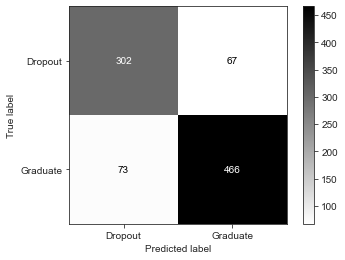

In [77]:
conf_matrix_plot(decision_tree, X_test, y_test)

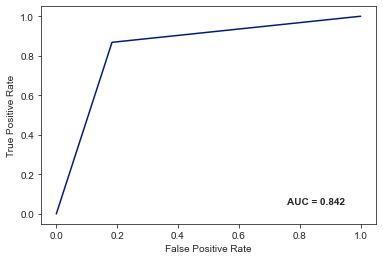

In [78]:
y_preds_prob_dt = decision_tree.predict_proba(X_test)[:, 1]
plot_roc_curve(y_test, y_preds_prob_dt)

### Random Forest Algorithm

In [79]:
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)
y_preds = rf.predict(X_test)

In [80]:
print_results('Random forest', y_test, y_preds)

Random forest
Accuracy: 0.904
Precision: 0.891
Recall: 0.955
F1 Score: 0.922


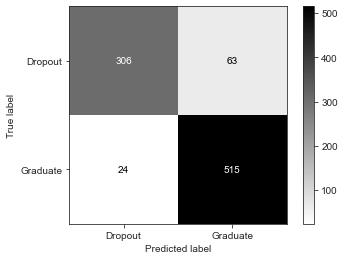

In [81]:
conf_matrix_plot(rf, X_test, y_test)

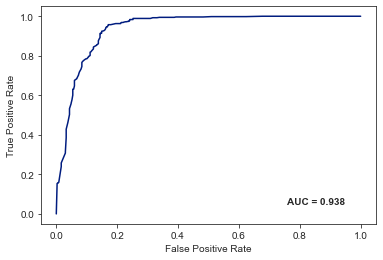

In [82]:
y_preds_prob_rf = rf.predict_proba(X_test)[:, 1]
plot_roc_curve(y_test, y_preds_prob_rf)

## Model Analysis

In [83]:
results.sort_values(by=['Accuracy'], ascending=False)

,Algorithm,Accuracy,Precision,Recall,F1 Score
4,Random forest,0.904185,0.891003,0.955473,0.922113
1,Logistic regression,0.886564,0.873288,0.946197,0.908281
2,SVM,0.867841,0.844007,0.953618,0.89547
3,Decision Tree,0.845815,0.874296,0.864564,0.869403
0,Naive Bayes,0.594714,0.595318,0.990724,0.743733


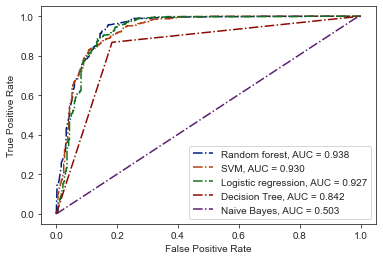

In [85]:
y_preds_probs = {'Naive Bayes': y_preds_prob_gnb, 'Logistic regression': y_preds_prob_lr, 'SVM': y_preds_prob_svm, 
                 'Decision Tree': y_preds_prob_dt, 'Random forest': y_preds_prob_rf}

aucs = {}
for i in y_preds_probs.keys():
    aucs[i] = metrics.roc_auc_score(y_test, y_preds_probs[i])
    
for i in dict(sorted(aucs.items(), key=operator.itemgetter(1), reverse=True)).keys():
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_preds_probs[i])
    auc = aucs[i]
    plt.plot(fpr, tpr, linestyle='dashdot', label=f'{i}, AUC = {auc:.3f}')
    
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.show()